In [1]:
import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
%matplotlib inline

In [2]:
def get_snips_baseline(event, fs, signal):
    
    start_in_seconds = event -10
    start_in_sample = int(start_in_seconds * fs)
    length_in_seconds = 20
    length_in_Sample =int(length_in_seconds * fs)
    snip = signal[start_in_sample: start_in_sample + length_in_Sample]
    baseline = np.mean(snip[0 : int((length_in_seconds/2)* fs)])
    std = np.std(snip[0 : int((length_in_seconds/2)* fs)])
    
    snip_baseline_corrected = (snip - baseline) / std

    return snip_baseline_corrected

In [3]:
def get_snips_baseline_8s(event, fs, signal):
    
    start_in_seconds = event -10
    start_in_sample = int(start_in_seconds * fs)
    length_in_seconds = 20
    length_in_Sample =int(length_in_seconds * fs)
    snip = signal[start_in_sample: start_in_sample + length_in_Sample]
    baseline = np.mean(snip[0 : int((length_in_seconds/2.5)* fs)])
    std = np.std(snip[0 : int((length_in_seconds/2)* fs)])
    
    snip_baseline_corrected = (snip - baseline) / std

    return snip_baseline_corrected

In [4]:
snips_dict_cues = {}

In [7]:
folder = "C:\\Data\\NAD\\tanks\\"
rows, header = tp.metafilereader("C:\\Users\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Photometry - GRAB-DA in NAc\\NAD_2_and_3.xls")

File is excel file. Making csv metafile first


In [8]:
#this is for all cued trials, row 10 excludes rats that didnt lick more than 50 times / session

for row in rows:
    if row[7] == "cues" and row[10] > 50:
        tank = row[0]
        data = tdt.read_block(folder+tank)

        sipper_ttl = row[13]
        sipper = getattr(data.epocs, sipper_ttl)   
        sipper_onset =sipper.onset
        
        licks_ttl = row[14]
        licks = getattr(data.epocs, licks_ttl)
        licks_onset =licks.onset
        lickdata = tp.lickCalc(licks_onset)

        blue_sig =   row[12]  
        UV_sig =   row[11] 

        blue = getattr(data.streams, blue_sig).data
        UV = getattr(data.streams,UV_sig).data

        fs = getattr(data.streams,UV_sig).fs


        correctedSignal = tp.processdata(blue, UV)

#for all trials 
        trials = sipper_onset

        snips = []

        for trial in trials:
            snip =get_snips_baseline_8s(trial, fs, correctedSignal)
            snips.append(snip)

        snips = np.array(snips)
        if len(snips[-1]) == len(snips[0]):
            mean_snips= np.mean(snips, axis=0) 
        else:
            snips =snips[0:-1]
            mean_snips= np.mean(snips, axis=0)
            
#for trials with licking, aligned to first lick?
        lickdata = tp.lickCalc(licks_onset)
        runs = lickdata["rStart"]
        lick_snips = []

        for run in runs:
            snip =get_snips_baseline(run, fs, correctedSignal)
            lick_snips.append(snip)

        lick_snips = np.array(lick_snips)
        if len(lick_snips[-1]) == len(lick_snips[0]):
            mean_lick_snips= np.mean(lick_snips, axis=0) 
        else:
            lick_snips =lick_snips[0:-1]
            mean_lick_snips= np.mean(lick_snips, axis=0)
            
        key = row[2]+"_s"+str(int(row[6]))

        snips_dict_cues[key]={}

        snips_dict_cues[key]["mouse"] = row[2]  
        snips_dict_cues[key]["sex"] = row[3]
        snips_dict_cues[key]["diet"] = row[4]
        snips_dict_cues[key]["session"] = row[6]
        snips_dict_cues[key]["snips"] = snips 
        snips_dict_cues[key]["snips_mean"] = mean_snips
        snips_dict_cues[key]["lick_snips"] = lick_snips 
        snips_dict_cues[key]["lick_snips_mean"] = mean_lick_snips
        snips_dict_cues[key]["lick data"] = lickdata
        snips_dict_cues[key]["sipper"] = sipper_onset
        

read from t=0s to t=3663.74s


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lick_utils.py:219: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


read from t=0s to t=3663.74s
read from t=0s to t=3663.74s
read from t=0s to t=3878.91s
read from t=0s to t=3878.91s
read from t=0s to t=3878.91s
read from t=0s to t=3746.96s
read from t=0s to t=3746.96s
read from t=0s to t=3746.96s
read from t=0s to t=3834.45s
read from t=0s to t=3834.45s
read from t=0s to t=3834.45s
read from t=0s to t=3843.93s
read from t=0s to t=3843.93s
read from t=0s to t=3787.72s
read from t=0s to t=3787.72s
read from t=0s to t=3787.72s
read from t=0s to t=3764.4s
read from t=0s to t=3764.4s
read from t=0s to t=3764.4s
read from t=0s to t=3690.75s
read from t=0s to t=3690.75s
read from t=0s to t=3690.75s
read from t=0s to t=3803.24s
read from t=0s to t=3803.24s
read from t=0s to t=3803.24s
read from t=0s to t=3688.07s
read from t=0s to t=3688.07s
read from t=0s to t=3688.07s
read from t=0s to t=3838.31s
read from t=0s to t=3838.31s
read from t=0s to t=3838.31s
read from t=0s to t=3943.75s
read from t=0s to t=3943.75s
read from t=0s to t=3943.75s
read from t=0s to

In [13]:
with open('NAD2_3_test.pickle', 'wb') as handle:
    pickle.dump(snips_dict_cues, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
with open('NAD2_3_test.pickle', 'rb') as handle:
    dictionarySnips = pickle.load(handle)

In [15]:
#all trials

Day1_Snips_NR = []
Day1_Snips_PR = []

Day2_Snips_NR = []
Day2_Snips_PR = []

Day3_Snips_NR = []
Day3_Snips_PR = []

Day4_Snips_NR = []
Day4_Snips_PR = []

Day5_Snips_NR = []
Day5_Snips_PR = []

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_Snips_PR.append(snips_dict_cues[key]["snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_Snips_PR.append(snips_dict_cues[key]["snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_Snips_PR.append(snips_dict_cues[key]["snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_Snips_PR.append(snips_dict_cues[key]["snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_Snips_NR.append(snips_dict_cues[key]["snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_Snips_PR.append(snips_dict_cues[key]["snips_mean"])

Cued trials, 10 seconds before and after sipper extension, all trials, mice with over 50 licks per trial


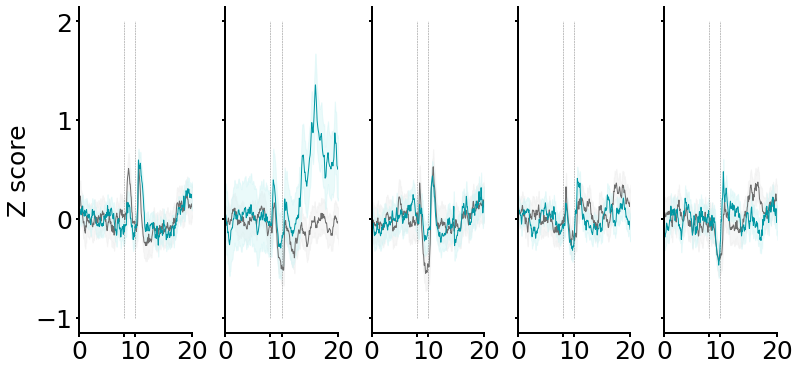

In [36]:
print("Cued trials, 10 seconds before and after sipper extension, all trials, mice with over 50 licks per trial")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 8000, 10000, 20000])
ax[0].set_xticklabels(["0", "", "10", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 8000, 10000, 20000])
ax[1].set_xticklabels(["0","", "10", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 8000, 10000, 20000])
ax[2].set_xticklabels(["0","", "10", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 8000, 10000, 20000])
ax[3].set_xticklabels(["0","", "10", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 8000, 10000, 20000])
ax[4].set_xticklabels(["0","", "10", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)

ax[0].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[1].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[2].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[3].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[4].vlines(x=[8000, 10000], ymin=-1, ymax=2, colors='black', ls='--', lw=0.5, alpha=0.5)


In [17]:
#trials with licking

Day1_Lick_Snips_NR = []
Day1_Lick_Snips_PR = []

Day2_Lick_Snips_NR = []
Day2_Lick_Snips_PR = []

Day3_Lick_Snips_NR = []
Day3_Lick_Snips_PR = []

Day4_Lick_Snips_NR = []
Day4_Lick_Snips_PR = []

Day5_Lick_Snips_NR = []
Day5_Lick_Snips_PR = []

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 1:
        Day1_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 2:
        Day2_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])        

for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 3:
        Day3_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])      
    
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 4:
        Day4_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])   
        
for key in snips_dict_cues.keys():
    if snips_dict_cues[key]["diet"] == "NR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_NR.append(snips_dict_cues[key]["lick_snips_mean"])
    elif snips_dict_cues[key]["diet"] == "PR" and snips_dict_cues[key]["session"] == 5:
        Day5_Lick_Snips_PR.append(snips_dict_cues[key]["lick_snips_mean"])

In [39]:
len(Day2_Lick_Snips_PR)

4

Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick, mice with over 50 licks per trial


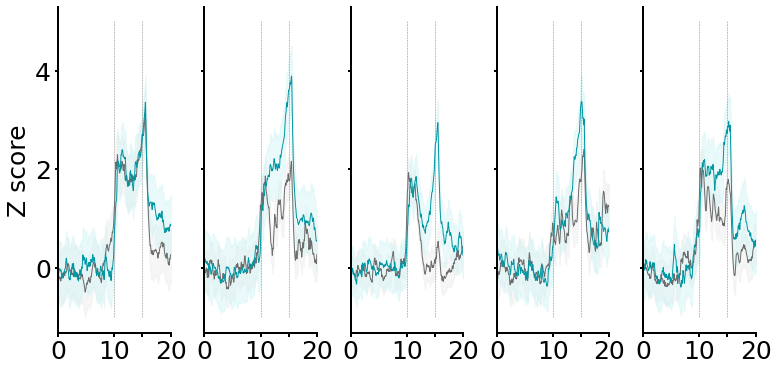

In [33]:
print("Cued trials, 10 seconds before and after sipper extension, trials with licking, aligned to first lick, mice with over 50 licks per trial")
f,ax=plt.subplots(figsize=(12.5,6), ncols=5, sharey=True)
f.subplots_adjust(wspace=0.3)

tp.shadedError(ax[0], Day1_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[0], Day1_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[1], Day2_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[1], Day2_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[2], Day3_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[2], Day3_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[3], Day4_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[3], Day4_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

tp.shadedError(ax[4], Day5_Lick_Snips_NR, linecolor="#6D6D6D", errorcolor="#EAEAEA")
tp.shadedError(ax[4], Day5_Lick_Snips_PR, linecolor="#0097A3", errorcolor="#CCF3F4")

ax[0].set_ylabel("Z score", fontsize = 25)
#ax[0].set_xlabel("Time")
ax[0].tick_params(labelsize=25, width=2)
ax[1].tick_params(labelsize=25, width=2)
ax[2].tick_params(labelsize=25, width=2)
ax[3].tick_params(labelsize=25, width=2)
ax[4].tick_params(labelsize=25, width=2)

ax[0].set_xlim([0, 20000])
ax[0].set_xticks([0, 10000, 15000, 20000])
ax[0].set_xticklabels(["0", "10", "", "20"])

ax[1].set_xlim([0, 20000])
ax[1].set_xticks([0, 10000,15000, 20000])
ax[1].set_xticklabels(["0", "10","", "20"])

ax[2].set_xlim([0, 20000])
ax[2].set_xticks([0, 10000,15000, 20000])
ax[2].set_xticklabels(["0", "10","", "20"])

ax[3].set_xlim([0, 20000])
ax[3].set_xticks([0, 10000,15000, 20000])
ax[3].set_xticklabels(["0", "10","", "20"])

ax[4].set_xlim([0, 20000])
ax[4].set_xticks([0, 10000,15000, 20000])
ax[4].set_xticklabels(["0", "10","", "20"])

#ax[0].set_title("session 1")
#ax[1].set_title("session 2")
#ax[2].set_title("session 3")
#ax[3].set_title("session 4")
#ax[4].set_title("session 5")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

ax[0].spines["bottom"].set_linewidth(2)
ax[1].spines["bottom"].set_linewidth(2)
ax[2].spines["bottom"].set_linewidth(2)
ax[3].spines["bottom"].set_linewidth(2)
ax[4].spines["bottom"].set_linewidth(2)

ax[0].spines["left"].set_linewidth(2)
ax[1].spines["left"].set_linewidth(2)
ax[2].spines["left"].set_linewidth(2)
ax[3].spines["left"].set_linewidth(2)
ax[4].spines["left"].set_linewidth(2)


ax[0].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[1].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[2].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[3].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)
ax[4].vlines(x=[10000, 15000], ymin=-1, ymax=5, colors='black', ls='--', lw=0.5, alpha=0.5)

